# Classification: Four Categories
---
Libraries:

In [15]:
import pandas as pd
import numpy as np
import spacy

from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

import joblib
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

Functions:

In [16]:
# Function For Text Normalization
def clean_text(data):
    urls = r'http\S+'
    non_unicode_char = r'\W'
    numbers = r'[0-9_]'
    fix_whitespace = r'\s+'
    single_whitespace = ' '
    
    data = (data.replace([urls], single_whitespace, regex=True)
                    .replace([non_unicode_char, numbers], single_whitespace, regex=True)
                    .replace(fix_whitespace, single_whitespace, regex=True))
    data = data.apply(lambda s: s.lower() if type(s) == str else s)
    return data

# NLP Functions
nlp_el = spacy.load('el_core_news_md')
nlp_en = spacy.load('en_core_web_sm')
STOPWORDS = set(list(spacy.lang.en.STOP_WORDS) + list(spacy.lang.el.STOP_WORDS))

def remove_stopwords(row):
    row = [str(token) for token in nlp_el(row)]
    return [w for w in row if w not in STOPWORDS]

def tokenize_lemmatize(row):
    return [str(token.lemma_) for token in nlp_el(row)]

def tokenize_lemmatize_en(row):
    return [str(token.lemma_) for token in nlp_en(row)]

Load Dataset:

In [17]:
validation_set = pd.read_csv('../../../datasets/Four-categories/four-categories-validation-set.csv')
validation_set = validation_set.replace(np.nan, '')
validation_set.head()

,Username,Profile name,Description,Recent Tweet,Recent 10 tweets,Recent 50 tweets,Recent 100 tweets,Tweets count,Favourites count,Followers count,Following count,Lists count,Created at,Category
0,SiaravaHotel,Hotel Siarava,"Located next to the lake of Ioannina, the trad...",Επισκεφθείτε τα Γιάννενα την Άνοιξη!\n\n#hotel...,Επισκεφθείτε τα Γιάννενα την Άνοιξη!\n\n#hote...,Επισκεφθείτε τα Γιάννενα την Άνοιξη!\n\n#hote...,Επισκεφθείτε τα Γιάννενα την Άνοιξη!\n\n#hote...,119,283,213,263,8,2014-07-22 11:32:49,Tourism
1,10DowningStreet,UK Prime Minister,Official page for Prime Minister @BorisJohnson...,Want to ask a minister a question about corona...,RT @BorisJohnson: Superb news that we’ve admi...,RT @BorisJohnson: Superb news that we’ve admi...,RT @BorisJohnson: Superb news that we’ve admi...,15922,1770,5850810,278,22101,2008-03-26 11:16:02,Politics
2,Cornell,Cornell University,Learning. Discovery. Engagement. Join the #Cor...,Architect Martin Miller from @CornellAAP discu...,New proposals to expand access to telehealth ...,New proposals to expand access to telehealth ...,New proposals to expand access to telehealth ...,20209,15097,314832,547,2495,2008-11-13 17:12:07,Education
3,lxblk,Alex Black,Assistant Professor of English at Hobart and W...,"RT @arithmatelle: In our newest #C19Podcast, @...","RT @arithmatelle: In our newest #C19Podcast, ...","RT @arithmatelle: In our newest #C19Podcast, ...","RT @arithmatelle: In our newest #C19Podcast, ...",63,16,144,454,2,2011-09-19 15:24:23,Education
4,MJSHChicago,MJ's Steak House,Michael Jordan's Steak House Chicago features ...,@wildmiya We hope you could please your palate...,@wildmiya We hope you could please your palat...,@wildmiya We hope you could please your palat...,@wildmiya We hope you could please your palat...,8814,2200,3712,2814,86,2011-04-28 19:01:27,Foodservice


In [18]:
# Variable to Hold predicted labels 
predictions = pd.DataFrame()
predictions['screen_name'] = validation_set['Username']
predictions['true_label'] = validation_set['Category']

In [12]:
codes = {'Tourism':0, 'Foodservice':1, 'Politics':2, 'Education': 4}
validation_set['Category'] = validation_set['Category'].map(codes)

# Case 1: Name and Description of a Node
---

              precision    recall  f1-score   support

     Tourism       1.00      1.00      1.00        25
 Foodservice       1.00      0.96      0.98        25
    Politics       0.96      1.00      0.98        25
   Education       1.00      1.00      1.00        25

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



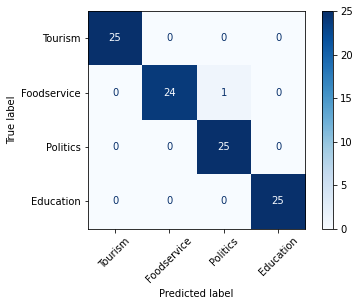

In [21]:
def get_text_data_fourcateg_nd(df):
    df['textdata'] = clean_text(df['Profile name'] + ' ' + df['Description'])
    df['textdata'] = df['textdata'].apply(lambda row: tokenize_lemmatize(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    df['textdata'] = df['textdata'].apply(lambda row: tokenize_lemmatize_en(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    df['textdata'] = df['textdata'].apply(lambda row: remove_stopwords(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    
    return df.textdata

# Load the model
model_nd = joblib.load('classifiers/classifier_fourcateg_nd.sav')

target_names = ['Tourism', 'Foodservice', 'Politics', 'Education']
predicted_labels = model_nd.predict(validation_set)
print(classification_report(y_true = validation_set.Category, y_pred=predicted_labels, target_names=target_names))
plot_confusion_matrix(model_nd, validation_set, validation_set.Category, display_labels=target_names, xticks_rotation=45, cmap=plt.cm.Blues)

In [22]:
predictions['nd'] = predicted_labels

# Case 2: Recent 100 Tweets of a Node
---

## Only Tweets

              precision    recall  f1-score   support

     Tourism       1.00      0.92      0.96        25
 Foodservice       0.86      1.00      0.93        25
    Politics       0.96      0.96      0.96        25
   Education       0.96      0.88      0.92        25

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



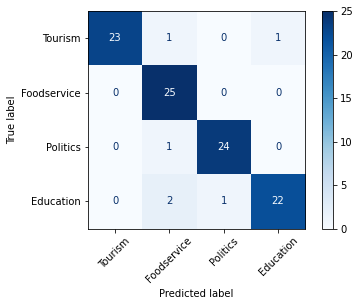

In [23]:
def get_text_data_t(df):
    df['textdata'] = clean_text(df['Recent 100 tweets'])
    df['textdata'] = df['textdata'].apply(lambda row: tokenize_lemmatize(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    df['textdata'] = df['textdata'].apply(lambda row: tokenize_lemmatize_en(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    df['textdata'] = df['textdata'].apply(lambda row: remove_stopwords(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    return df.textdata


# Load the model
model_t = joblib.load('classifiers/classifier_fourcateg_t.sav')

target_names = ['Tourism', 'Foodservice', 'Politics', 'Education']
predicted_labels = model_t.predict(validation_set)
print(classification_report(y_true = validation_set.Category, y_pred=predicted_labels, target_names=target_names))
plot_confusion_matrix(model_t, validation_set, validation_set.Category, display_labels=target_names, xticks_rotation=45, cmap=plt.cm.Blues)

predictions['t'] = predicted_labels

## Name, Description and Tweets

              precision    recall  f1-score   support

     Tourism       1.00      1.00      1.00        25
 Foodservice       1.00      1.00      1.00        25
    Politics       0.96      1.00      0.98        25
   Education       1.00      0.96      0.98        25

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



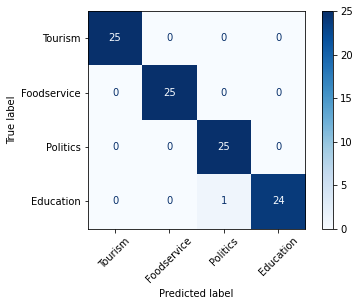

In [24]:
def get_text_data_ndt(df):
    df['textdata'] = clean_text(df['Profile name'] + ' ' + df['Description'] + ' ' + df['Recent 100 tweets'])
    df['textdata'] = df['textdata'].apply(lambda row: tokenize_lemmatize(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    df['textdata'] = df['textdata'].apply(lambda row: tokenize_lemmatize_en(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    df['textdata'] = df['textdata'].apply(lambda row: remove_stopwords(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    return df.textdata

# Load the model
model_ndt = joblib.load('classifiers/classifier_fourcateg_ndt.sav')

target_names = ['Tourism', 'Foodservice', 'Politics', 'Education']
predicted_labels = model_ndt.predict(validation_set)
print(classification_report(y_true = validation_set.Category, y_pred=predicted_labels, target_names=target_names))
plot_confusion_matrix(model_ndt, validation_set, validation_set.Category, display_labels=target_names, xticks_rotation=45, cmap=plt.cm.Blues)

predictions['ndt'] = predicted_labels

In [28]:
predictions

,screen_name,true_label,nd,t,ndt
0,SiaravaHotel,Tourism,Tourism,Tourism,Tourism
1,10DowningStreet,Politics,Politics,Politics,Politics
2,Cornell,Education,Education,Education,Education
3,lxblk,Education,Education,Education,Education
4,MJSHChicago,Foodservice,Foodservice,Foodservice,Foodservice
...,...,...,...,...,...
95,VisitScotland,Tourism,Tourism,Tourism,Tourism
96,Princeton,Education,Education,Education,Education
97,theodorikakosp,Politics,Politics,Politics,Politics
98,TheLona,Foodservice,Foodservice,Foodservice,Foodservice


In [31]:
predictions[(predictions['true_label'] != predictions['t'])][['screen_name','true_label','t']]

,screen_name,true_label,t
38,MarieCiarleglio,Tourism,Foodservice
69,realDonaldTrump,Politics,Foodservice
73,Booktripgo,Tourism,Foodservice
74,learn2counsel,Education,Foodservice
76,LangLearnInst,Education,Tourism
83,_ScotlandTours,Tourism,Politics


In [44]:
print(validation_set['Recent 100 tweets'].iloc[76])

 https://t.co/cFTDBGrdHO
#learnfrench Don't worry! Play! HAVE FUN!!
#fun #tiptuesday #quicktip #quicktips #quicktiptuesday #play #languagelearningisfun… https://t.co/A1WZDdERsl Happy National Trivia Day! Answer on Instagram!
#languagefacts #trivia #nationaltriviaday #learnmandarin… https://t.co/I0mv7zXiYu Is one of your goals for the new year to become conversational in French? Contact us for a free language consultati… https://t.co/m57OGZo8sA What are you leaving behind in 2020?💬
#leaveit #leaveitbehind #newyearnewyou #newyearnewgoals #nodrama #goals… https://t.co/XPq66sXgnd Prevent offensive language misappropriation🤣 - learn a foreign language! Full 2 minute Youtube video link in Instag… https://t.co/RGoIswy3pa BIG announcement coming soon - we've made a major change designed for serious language learners like YOU...stay tun… https://t.co/irji34fbZa Although 70% of the global population isn't Christian, nearly 80% observe some form of Christmas traditions! Ever w… https://t.co/rO35D

In [43]:
predictions[(predictions['true_label'] != predictions['ndt'])][['screen_name','true_label','ndt']]

,screen_name,true_label,ndt
83,_ScotlandTours,Tourism,Politics


In [46]:
print(validation_set['Recent 100 tweets'].iloc[83])

 RT @VisitScotland: @Martine47Marie @WCWScotland We hope you can visit sometime too, it looks just as good in person! 😍 - Katie Tobermory, Mull Scotland, Bespoke Scotland Tours, Private Tours of Scotland, Scotland Tours, St Andrews Taxis,  Sco… https://t.co/u3kVZvvo1V RT @VisitScotland: @CHPhotography15 Talk about reflection, perfection! 😍👌 - Alex Highlands Scotland, Bespoke Scotland Tours, Private Tours of Scotland, Scotland Tours, St Andrews Taxis,  Scotland.… https://t.co/cWzS3zk8PU RT @VisitScotland: @awenphotos @VisitAyrshire @CulzeanOfficial @AilsaCraigrock What a stunning viewpoint! 🤩 - Katie @justinpowellweb @moureaucarolin2 @Sebastian023456 @EdinburghDirect @BeautifulScotl1 @CromarGrant @GutridgeKelly… https://t.co/MbWwYLA4NC Kelpies Falkirk, Bespoke Scotland Tours, Private Tours of Scotland, Scotland Tours, St Andrews Taxis,  Scotland.… https://t.co/CUTKTIoMWQ RT @VisitScotland: @LargoJd Sounds brilliant! We have some great recommendations for things to do in and around Perth